## Problem statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [513]:
import numpy as np
import pandas as pd
import sklearn

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [514]:
df = pd.read_csv('train.csv') 
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [516]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## EDA Analysis

In [517]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [518]:
df.Alley.isnull().sum()

1369

In [519]:
# Check percentage of missing data
round((100*df.isnull().sum() / len(df)).sort_values(ascending = False), 2)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [520]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [521]:
df.Fence.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Fence, dtype: object

#### Conclusion: Based on above data and their missing percentages we can safely remove ID and other fields -> 'PoolQC', 'MiscFeature', 'Alley'

In [522]:
df.drop(['Id'],  axis = 1, inplace = True)
df.shape

(1460, 80)

In [523]:
df.drop(['PoolQC', 'MiscFeature', 'Alley'],  axis = 1, inplace = True)
df.shape

(1460, 77)

In [524]:
import seaborn as sns
import matplotlib.pyplot as plt

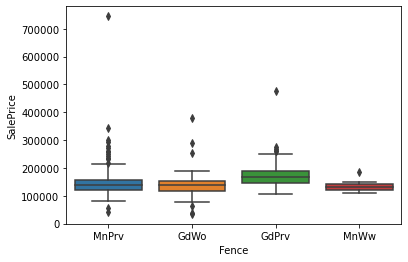

In [525]:
sns.boxplot(x= df['Fence'], y=df["SalePrice"] )
plt.xlabel('Fence')
plt.ylabel('SalePrice')
plt.show()

#### Conclusion: Based on abvoe boxplot and its skewedness we can safely remove 'Fence' because it is not spread across all ranges of price.

In [526]:
df.drop(['Fence'],  axis = 1, inplace = True)
df.shape

(1460, 76)

In [527]:
df.PoolArea.value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [528]:
# Check percentage of missing data
round((100*df.isnull().sum() / len(df)).sort_values(ascending = False), 2)

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
                ...  
TotalBsmtSF      0.00
Heating          0.00
MSZoning         0.00
CentralAir       0.00
SalePrice        0.00
Length: 76, dtype: float64

In [529]:
df.isna().sum().sort_values(ascending=False)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
               ... 
TotalBsmtSF       0
Heating           0
MSZoning          0
CentralAir        0
SalePrice         0
Length: 76, dtype: int64

In [530]:
# Percentage of Null values
null_values=[(i,df[i].isna().mean()*100) for i in df]
null_df=pd.DataFrame(null_values,columns=['column_name','percentage'])
null_df

,column_name,percentage
0,MSSubClass,0.000000
1,MSZoning,0.000000
2,LotFrontage,17.739726
3,LotArea,0.000000
4,Street,0.000000
...,...,...
71,MoSold,0.000000
72,YrSold,0.000000
73,SaleType,0.000000
74,SaleCondition,0.000000


In [531]:
null_df[null_df['percentage']>40].sort_values('percentage')

,column_name,percentage
55,FireplaceQu,47.260274


In [532]:
df.shape

(1460, 76)

#### Conclusion: Based on above information and its skewedness we can safely remove 'PoolArea' and 'FireplaceQu'

In [533]:
df.drop(['PoolArea', 'FireplaceQu'],  axis = 1, inplace = True)
df.shape

(1460, 74)

In [534]:
cols_to_drop = []
for col in df.columns :
    max_percent = np.max(df[col].value_counts(normalize=True) * 100)
    if (max_percent > 90) :
        print(col, 'has maximum percentage of one particular value=', str(max_percent))
        cols_to_drop.append(col)

Street has maximum percentage of one particular value= 99.58904109589041
Utilities has maximum percentage of one particular value= 99.93150684931507
LandSlope has maximum percentage of one particular value= 94.65753424657535
Condition2 has maximum percentage of one particular value= 98.97260273972603
RoofMatl has maximum percentage of one particular value= 98.21917808219179
BsmtCond has maximum percentage of one particular value= 92.12930428671821
Heating has maximum percentage of one particular value= 97.80821917808218
CentralAir has maximum percentage of one particular value= 93.4931506849315
Electrical has maximum percentage of one particular value= 91.43248800548321
LowQualFinSF has maximum percentage of one particular value= 98.21917808219179
BsmtHalfBath has maximum percentage of one particular value= 94.3835616438356
KitchenAbvGr has maximum percentage of one particular value= 95.34246575342465
Functional has maximum percentage of one particular value= 93.15068493150685
GarageQu

#### Conclusion: Based on above percentages with one particular value and its skewedness we can safely remove all above columns

In [535]:
df.shape

(1460, 74)

In [536]:
df.drop(cols_to_drop,  axis = 1, inplace = True)
df.shape

(1460, 55)

In [537]:
# Fetching dataframe for numeric and categorical features separately
numerical = df.select_dtypes(exclude=['object'])
categorical = df.select_dtypes(include=['object'])
print(numerical.columns)
print(categorical.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')


#### Note: These numerical and categorical columns will be used many times for further processing

## Step 2: Visualising the Data
## Step 3: Data Preparation
- Encoding:
  - Converting binary vars to 1/0 But we dont have any as such after dropping few columns
  - Other categorical vars to dummy vars

### Visualizing the numerical variables along with heat_index

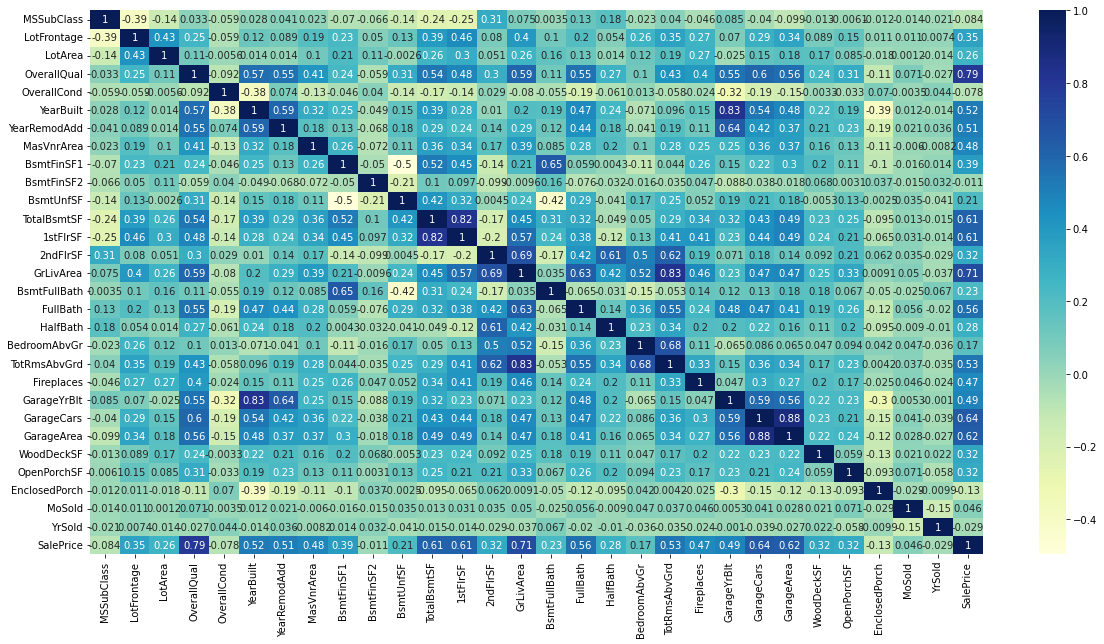

In [538]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [539]:
highest_corr_features = df.corr().index[abs(df.corr()["SalePrice"])>0.5]
highest_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

### Removing outliers

In [540]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.99)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [541]:
for col in numerical:
    df = remove_outlier(df, col)

In [542]:
df.shape

(1117, 55)

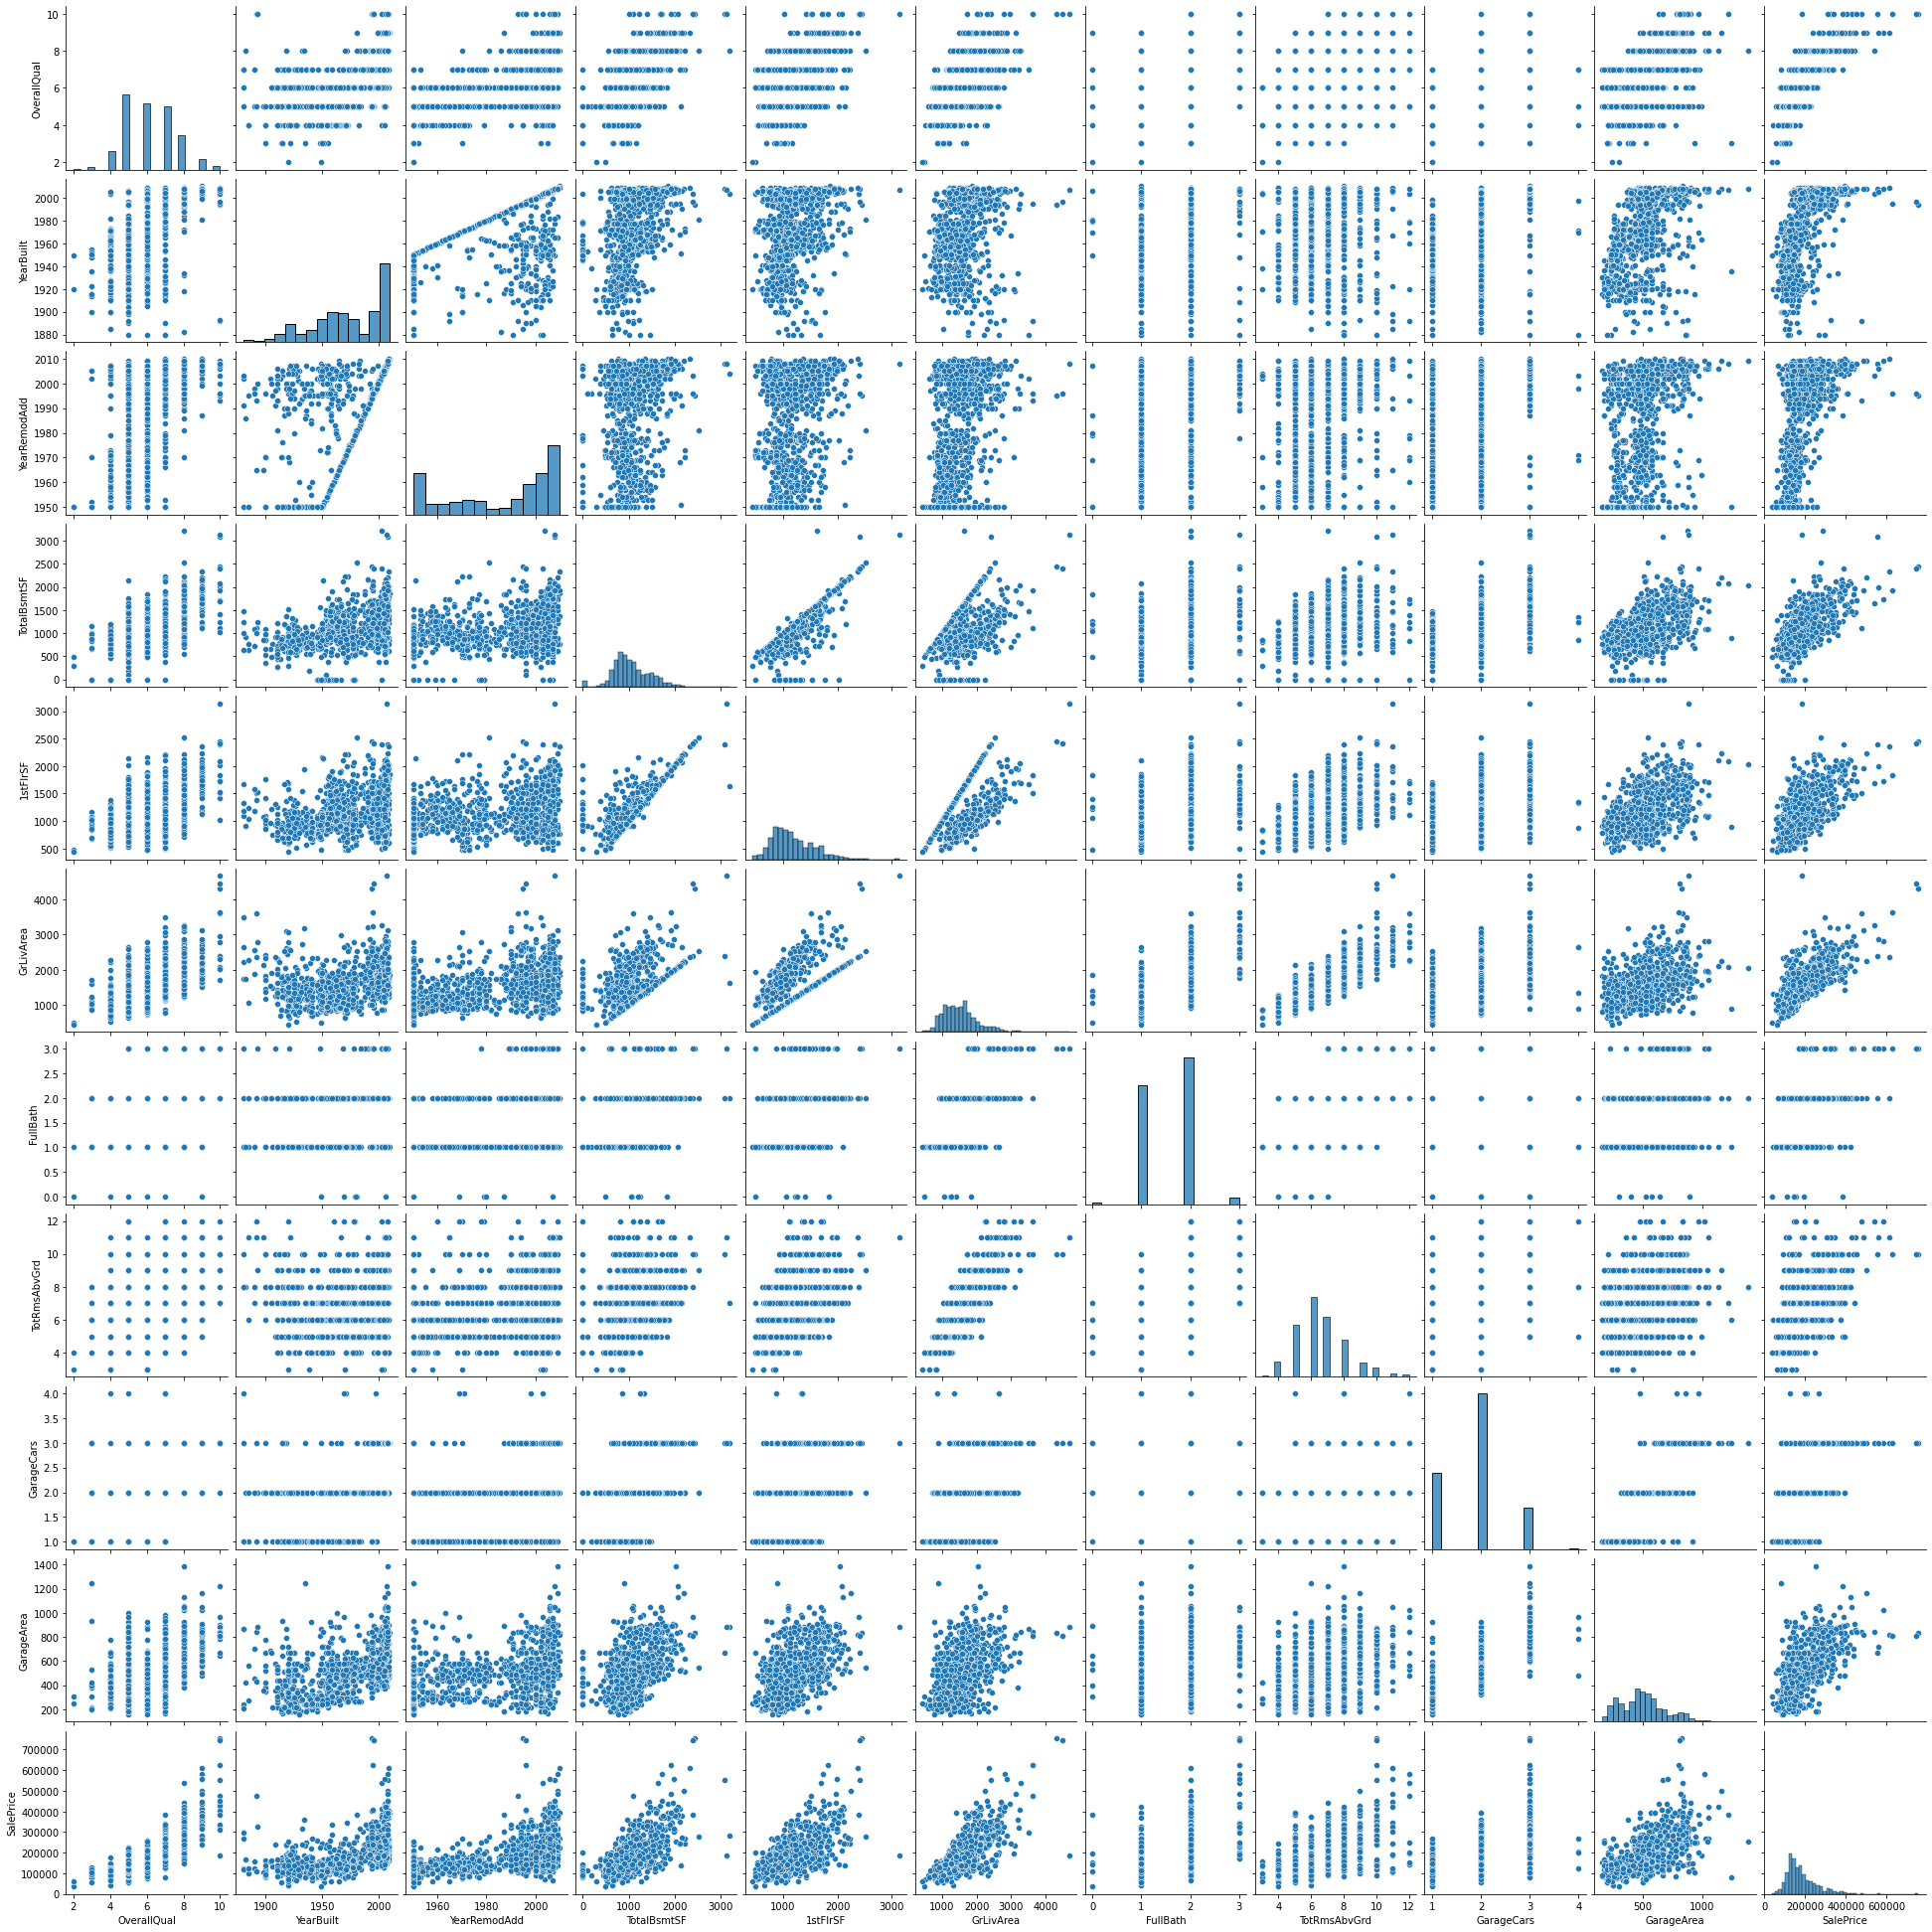

In [543]:
sns.pairplot(df[highest_corr_features])
plt.show()

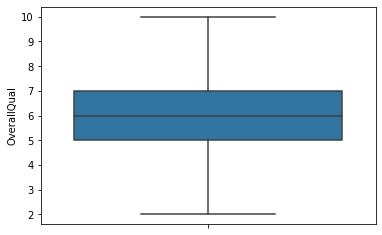

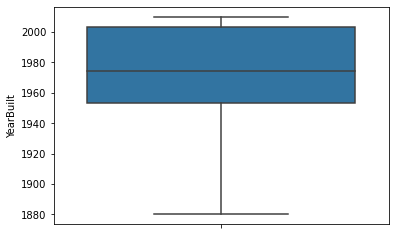

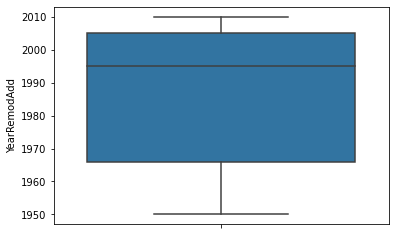

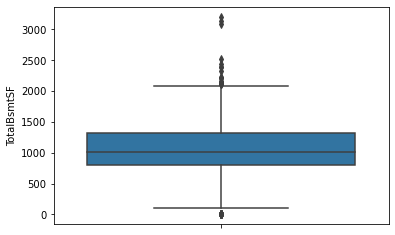

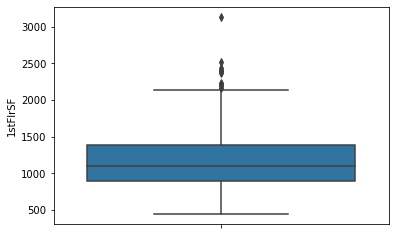

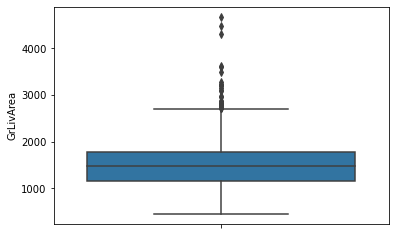

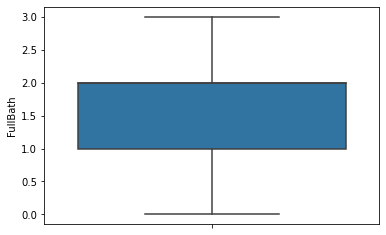

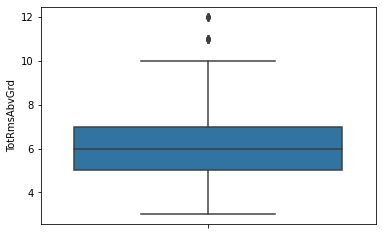

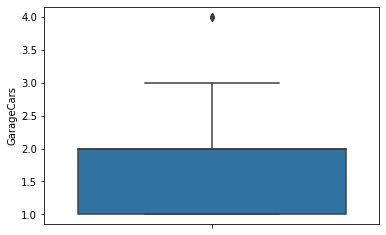

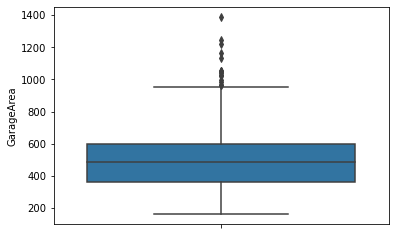

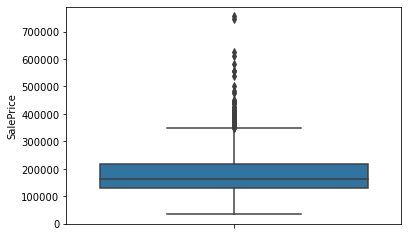

In [544]:
# num_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in highest_corr_features:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.show()

In [545]:
# Fetching dataframe for numeric and categorical features separately
numerical = df.select_dtypes(exclude=['object'])
categorical = df.select_dtypes(include=['object'])
print(numerical.columns)
print(categorical.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')


### Imputing values with Median and Mode

In [546]:
for feature in numerical.columns:
    df[feature] = df[feature].fillna(df[feature].median())

In [547]:
for feature in categorical.columns:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [548]:
df.isna().sum().sort_values(ascending=False)

MSSubClass       0
Fireplaces       0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
GarageType       0
BsmtFinSF2       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
BsmtUnfSF        0
BsmtFinType2     0
MSZoning         0
YearBuilt        0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
BsmtFinSF1       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure

### Dummies have to be created for all the categorical features

In [549]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [550]:
df['YrSold_Age'] = df.YrSold.max() - df.YrSold
df['YearRemodAdd_Age'] = df.YearRemodAdd.max() - df.YearRemodAdd
df['YearBuilt_Age'] = df.YearBuilt.max() - df.YearBuilt
df['GarageYrBlt_Age'] = df.GarageYrBlt.max() - df.GarageYrBlt

In [551]:
df.shape

(1117, 180)

In [552]:
#Removing one of the high correlated from pairs checked using heatmap
df.drop([ '1stFlrSF', 'TotRmsAbvGrd','GarageCars','GarageYrBlt'],  axis = 1, inplace = True)
df.shape

(1117, 176)

In [553]:
# Fetching dataframe for numeric and categorical features separately
numerical = df.select_dtypes(exclude=['object'])
categorical = df.select_dtypes(include=['object'])
print(numerical.columns)
print(categorical.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'YrSold_Age', 'YearRemodAdd_Age', 'YearBuilt_Age', 'GarageYrBlt_Age'],
      dtype='object', length=176)
Index([], dtype='object')


## Step 4: Splitting the Data into Training and Testing Sets

Main step for regression is performing a train-test split.
- Splitting into train and test
- Rescaling of variables

### Splitting into train and test

In [554]:
# split into X and y
y = df.pop('SalePrice')
X = df

### Scaling of variables

In [555]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'YrSold_Age', 'YearRemodAdd_Age', 'YearBuilt_Age', 'GarageYrBlt_Age'],
      dtype='object', length=175)

In [556]:
import sklearn
from sklearn.model_selection import train_test_split

In [557]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [558]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YrSold_Age,YearRemodAdd_Age,YearBuilt_Age,GarageYrBlt_Age
228,0.089983,-0.190383,-0.512364,0.575862,-0.525385,0.798766,0.586406,7.912031,0.489409,-0.281589,...,0.419273,-0.029934,-0.090126,-0.127979,0.491031,-0.343683,0.596059,-0.586406,-0.798766,-0.719825
263,0.089983,0.677422,0.924330,1.301864,-0.525385,0.960120,0.776680,-0.573653,-0.980018,-0.281589,...,0.419273,-0.029934,-0.090126,-0.127979,0.491031,-0.343683,-1.650728,-0.776680,-0.960120,-0.913375
339,-0.149329,-0.144709,0.535755,-0.150140,2.282533,-1.686082,0.681543,-0.573653,-0.980018,-0.281589,...,-2.385083,-0.029934,-0.090126,-0.127979,0.491031,-0.343683,-0.901799,-0.681543,1.686082,-1.029505
153,-0.867264,1.316857,0.429356,0.575862,-0.525385,0.572871,0.205860,-0.573653,-0.980018,-0.281589,...,0.419273,-0.029934,-0.090126,-0.127979,0.491031,-0.343683,-0.901799,-0.205860,-0.572871,-0.448855
271,-0.149329,-0.464427,-0.155940,-0.876142,0.410588,-1.008396,-1.696873,-0.573653,-0.445681,2.149475,...,-2.385083,-0.029934,-0.090126,-0.127979,0.491031,-0.343683,-0.152870,1.696873,1.008396,1.447933


In [559]:
from sklearn.preprocessing import MinMaxScaler

## Step 5: Building a linear model

Lets start building a regression line with RFE through the training data using `sklearn`.

### we can use RFE which is automated way of finding features

In [560]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [561]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)
rfe = rfe.fit(X_train, y_train)

In [562]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 78),
 ('LotFrontage', False, 66),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 9),
 ('MasVnrArea', False, 35),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 10),
 ('BsmtUnfSF', False, 15),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 121),
 ('FullBath', False, 51),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', False, 88),
 ('Fireplaces', False, 26),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 60),
 ('OpenPorchSF', False, 86),
 ('EnclosedPorch', False, 45),
 ('MoSold', False, 64),
 ('YrSold', False, 12),
 ('MSZoning_FV', False, 29),
 ('MSZoning_RH', False, 37),
 ('MSZoning_RL', False, 32),
 ('MSZoning_RM', False, 31),
 ('LotShape_IR2', False, 90),
 ('LotShape_IR3', False, 129),
 ('LotShape_Reg', False, 84),
 ('LandContour_HLS', False, 59),
 ('LandContour_Low', False, 135),
 ('LandContour_Lvl', False, 58),
 ('LotConfig_CulD

In [563]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_PosN', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'Exterior1st_BrkFace', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'SaleType_New', 'YearBuilt_Age'],
      dtype='object')

In [564]:
# Predictions on the basis of the model
y_pred = rfe.predict(X_train)
#y_pred

In [565]:
from sklearn.metrics import r2_score, mean_squared_error

In [566]:
# Find the value of r squared
r2_score(y_train , y_pred)

0.8844256353074743

### Note: Here RFE is bringing good prediction power. Its able to explain 88 percent of variance in sale price
### But this can be improved with Ridge and Lasso as they would penalize some coefficients with the regularization parameter. We can see them below. 

In [567]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y_train - y_pred))
print(rss)
mse = mean_squared_error(y_train, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

607746446966.8801
778164464.7463254
27895.5993795854


In [568]:
# Residual analysis
y_res = y_train - y_pred
#y_res

In [569]:
y_res.shape

(781,)

In [570]:
y_pred.shape

(781,)

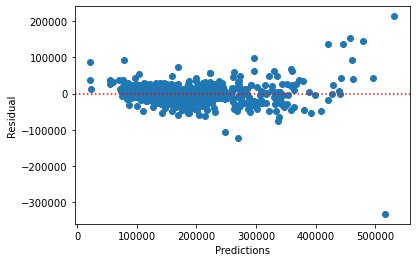

In [571]:
# df['res'] = y_res
plt.scatter( y_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Note: Here residual plot is not fully randomly distributed.

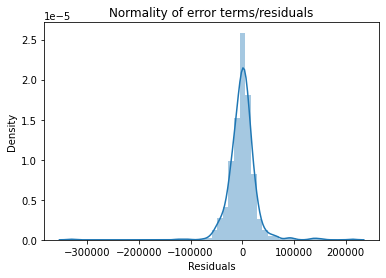

In [572]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Ridge Regression

In [573]:
from sklearn.preprocessing import PolynomialFeatures

In [574]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [575]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [576]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [577]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.54980039e+03  3.05658567e+03  3.82202456e+03  1.18639313e+04
  4.92154311e+03  3.13288516e+03  1.79865740e+03  3.16102211e+03
  6.29098575e+03  1.91981710e+03  1.19529959e+03  8.64525464e+03
  6.62290484e+03  1.39599167e+04  8.57830021e+02  4.87206695e+03
  2.97502560e+03  4.04426717e+02  3.53382681e+03  5.58028832e+03
  2.03107315e+03 -3.95698127e+02 -1.71694631e+03 -1.26873440e+03
  2.99445408e+02  1.63498020e+03  2.81343392e+02  8.28480647e+02
  8.37336850e+02  1.27318060e+03  1.33958468e+02  5.23870991e+02
  2.07537118e+03 -1.08231684e+03  1.29798670e+03  3.91031632e+03
 -7.94006997e+02 -8.87515109e+02  7.63856263e+02 -2.09609859e+02
 -3.50016745e+01  4.35911917e+02 -1.52531881e+03 -9.49983310e+02
  3.41191758e+03 -4.36759322e+03 -2.12702276e+03 -8.17726958e+02
 -9.32026462e+02 -2.61025574e+03 -1.95222702e+03  2.45864911e+02
 -1.15566376e+03  6.35576196e+03  7.09493595e+03 -2.55190974e+03
 -2.56503694e+02 -6.07854608e+02  6.55165485e+02  7.30159759e+02
  6.45992767e+03 -9.81307

In [578]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9037696078319818
0.8903282379209618
506026393360.95593
263913642424.4703
647921118.2598667
785457269.1204474


### Note: Here in Ridge some betterment is there from RFE method. 
### But since this is not making any feature selection by keeping some coefficeints to zero.

## Lasso

In [579]:
from sklearn.linear_model import Lasso

In [580]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [581]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [582]:
#Fitting Lasso model for alpha = 1000 and printing coefficients which have been penalised

alpha = 1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [583]:
lasso.coef_

array([-4.75017446e+03,  1.37054374e+03,  3.03706370e+03,  1.76516870e+04,
        4.49833735e+03,  3.74188778e+03,  1.54087372e+00,  2.21370953e+03,
        7.06791858e+03,  0.00000000e+00, -0.00000000e+00,  5.01875280e+03,
        0.00000000e+00,  2.53583034e+04,  0.00000000e+00,  1.15511758e+03,
        1.31435137e+03, -0.00000000e+00,  1.88851549e+03,  5.45496546e+03,
        5.99822214e+02, -0.00000000e+00, -1.00292723e+03, -5.30972256e+02,
        8.12133637e+01,  4.02206105e+02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  7.11484264e+02,  0.00000000e+00, -0.00000000e+00,
        6.64899157e+02, -5.59959027e+02,  0.00000000e+00,  3.33357558e+03,
       -0.00000000e+00, -3.41866096e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.21673331e+02, -3.64539287e+00,  0.00000000e+00,
        3.58889071e+03, -2.13277088e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.24702905e+03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [584]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8909835449783725
0.8939741490087668
573261755550.9138
255140138134.0503
734009930.2828602
759345649.208483


In [585]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }
# , 
#         'Linear Regression': metric
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
# , 'Linear Regression'

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.037696e-01,8.909835e-01
1,R2 Score (Test),8.903282e-01,8.939741e-01
2,RSS (Train),5.060264e+11,5.732618e+11
3,RSS (Test),2.639136e+11,2.551401e+11
4,MSE (Train),2.545429e+04,2.709262e+04
5,MSE (Test),2.802601e+04,2.755623e+04


### Note: here with Lasso we can see much better improvement since this does feature selection by penalizing some coefficients to completely zero.

## Lets observe the changes in the coefficients after regularization

In [586]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'YrSold_Age', 'YearRemodAdd_Age', 'YearBuilt_Age', 'GarageYrBlt_Age'],
      dtype='object', length=175)

In [587]:
betas = pd.DataFrame(index=X.columns)

In [588]:
betas.rows = X.columns

In [589]:
# betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [591]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Ridge,Lasso
MSSubClass,-3.549800e+03,-4750.174460
LotFrontage,3.056586e+03,1370.543744
LotArea,3.822025e+03,3037.063697
OverallQual,1.186393e+04,17651.686966
OverallCond,4.921543e+03,4498.337354
YearBuilt,3.132885e+03,3741.887782
YearRemodAdd,1.798657e+03,1.540874
MasVnrArea,3.161022e+03,2213.709532
BsmtFinSF1,6.290986e+03,7067.918584
BsmtFinSF2,1.919817e+03,0.000000


#### Question 1

#### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [593]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.11169977e+03  3.21300547e+03  3.99566887e+03  1.07946302e+04
  3.86855585e+03  2.57374643e+03  2.15066467e+03  3.56302778e+03
  6.09998588e+03  1.43769390e+03  1.16207110e+03  8.22771910e+03
  5.49502162e+03  1.21226738e+04  1.11625691e+03  4.71934430e+03
  2.93321804e+03  7.27270118e+02  4.02401863e+03  5.62064949e+03
  2.11495827e+03  3.24950389e+01 -1.57388844e+03 -9.97982842e+02
  4.07433242e+02  1.21281697e+03  7.44609015e+01  8.50737314e+02
 -1.65513306e+00  1.18112325e+03  6.99334534e+01 -1.22863704e+01
  1.76307625e+03 -1.06470799e+03  8.79281293e+02  3.65436061e+03
 -7.20976818e+02 -7.95233929e+02  4.06904717e+02 -1.26821003e+02
  3.35652448e+01  6.81401067e+02 -1.47356135e+03 -1.31665912e+03
  3.15189711e+03 -3.81652503e+03 -2.37766428e+03 -6.25736621e+02
 -1.08795571e+03 -2.24707843e+03 -1.75368092e+03  2.46485150e+02
 -9.46772350e+02  5.69626594e+03  6.54374200e+03 -1.86710443e+03
 -3.21424028e+02 -5.67448822e+02  3.71663389e+02  5.77490905e+02
  5.78613113e+03 -9.47573

In [594]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8965394217363346
0.8860667178448332
544046242505.08923
274168545457.26385
696602103.0794996
815977813.8609043


In [595]:
#Fitting Lasso model for alpha = 1000 and printing coefficients which have been penalised

alpha = 2000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=2000)

In [596]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8714429477831335
0.8831173205226723
676015757691.5417
281265962107.5724
865577154.5346246
837101077.7011083


### Ans: For Ridge and Lasso when we doubled the value of alpha, model started loosing accuracy in predicting the SalePrice because it starts underfitting. 

#### Question 2

#### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

### Ans: Based on this assignment, we can definitely go with lasso as it has penalized many coefficents and improved accuracy.
### Because we always wanted to get simpler model as per Occam Razor's definition. Need to go for simpler and generalizable model always.

#### Question 3

#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Ans: These are most important predictor variables in the same order for the current model which was built -> 
### MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond 

### If we need to discard these features we may incur some predicting power but since we don’t have a choice, can consider next set of important varaibles  ->
### YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2

#### Question 4

#### How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

### Ans: We always need to make our model simple enough but not simpler as per Occam Razor's simplified theory on model building. 
### Because if we make more simpler, it may fail to predict the dependent variable means Bias will be high (It fails to predict in training set itself) or if we make more complex also there is another problem of overfitting.
### which will cause model fail in test set miserably.